In [169]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_a8008eafebc34ef19eef15b1eaf4e2a6 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='s1lgty2cCW8sljwsCUsti5I-QcUm44LGV3YPo3DueKxs',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_a8008eafebc34ef19eef15b1eaf4e2a6.get_object(Bucket='diabeticspredictionsystem-donotdelete-pr-uuii5uswmrrzh2',Key='diabetes.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

train_df = pd.read_csv(body)
train_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [170]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
import pickle
%matplotlib inline

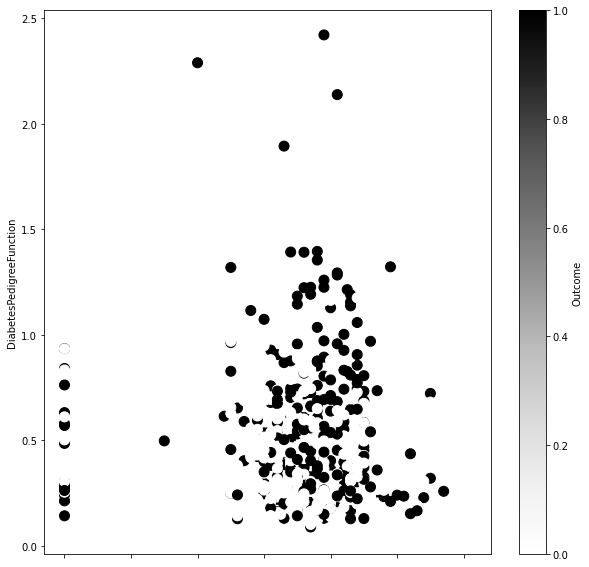

In [171]:
train_df.plot.scatter(x='BloodPressure',y='DiabetesPedigreeFunction',c='Outcome',s=100,figsize=(10,10))

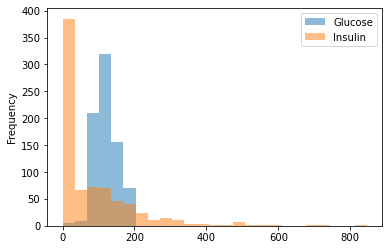

In [172]:
train_df[['Glucose', 'Insulin']].plot.hist(alpha=0.5,bins=25)

Text(0.5, 1.0, 'train_df.corr()')

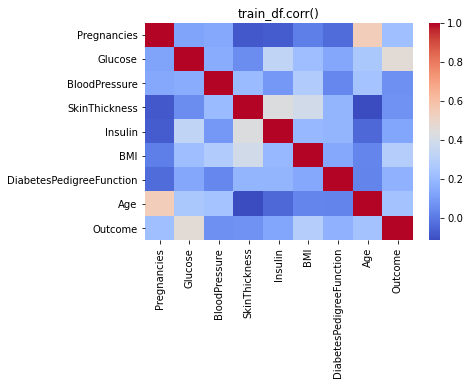

In [173]:
sns.heatmap(train_df.corr(),cmap='coolwarm')
plt.title('train_df.corr()')

In [174]:
train_df.isnull().sum() 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [175]:
X = train_df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y= train_df['Outcome']

In [176]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [177]:
y=np.array(y)

In [178]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [179]:
from sklearn.linear_model import LogisticRegression

In [180]:
lr = LogisticRegression()

In [181]:
lr.fit(X_train,y_train)

LogisticRegression()

In [182]:
pred = lr.predict(X_test)

In [183]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,roc_auc_score
print(confusion_matrix(pred,y_test))
print(classification_report(pred,y_test))
print(accuracy_score(pred,y_test))
print(roc_auc_score(pred,y_test))

[[98 18]
 [ 9 29]]
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       116
           1       0.62      0.76      0.68        38

    accuracy                           0.82       154
   macro avg       0.77      0.80      0.78       154
weighted avg       0.84      0.82      0.83       154

0.8246753246753247
0.8039927404718693


In [184]:
pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [185]:
!pip install watson-machine-learning-client

In [186]:
wml_credentials = {
                      "apikey":"qZGN54G88XYmaMCyqvFNOrrYYjftx3MldpW_VfspDcL_",
                      "url": "https://us-south.ml.cloud.ibm.com"
}

In [187]:
from ibm_watson_machine_learning import APIClient
wml_client = APIClient(wml_credentials)

In [188]:
wml_client.repository.ModelMetaNames.show()

------------------------  ----  --------  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
META_PROP NAME            TYPE  REQUIRED  SCHEMA
NAME                      str   Y
DESCRIPTION               str   N
INPUT_DATA_SCHEMA         list  N         {'id(required)': 'string', 'fields(required)': [{'name(required)': 'string', 'type(required)': 'string', 'nullable(optional)': 'string'}]}
TRAINING_DATA_REFERENCES  list  N         [{'name(optional)': 'string', 'type(required)': 'string', 'connection(required)': {'endpoint_url(required)': 'string', 'access_key_id(required)': 'string', 'secret_access_key(required)': 'string'},

In [189]:
def guid_from_space_name(wml_client, space_name):
     instance_details = wml_client.service_instance.get_details()
     space = wml_client.spaces.get_details()
     return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['guid'])

In [190]:
space_uid = "975d58d0-b13c-4921-9a73-66a5dd47a75c"

In [191]:
wml_client.set.default_space(space_uid)

'SUCCESS'

In [192]:
sw_spec_id = wml_client.software_specifications.get_id_by_name('default_py3.7')
meta_props={
 wml_client.repository.ModelMetaNames.NAME: "Diabetics_Prediction_System",
 wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: sw_spec_id,
 wml_client.repository.ModelMetaNames.TYPE: "scikit-learn_0.23",
}

In [193]:
model_artifact = wml_client.repository.store_model(lr,
                                                meta_props=meta_props,
                                                training_data=X_train,
                                                training_target=y_train)
model_uid = wml_client.repository.get_model_uid(model_artifact)
print("Model UID = " + model_uid)

Model UID = 76c1193b-b402-47bd-b8b6-418d75df6f48


In [194]:
model_details = wml_client.repository.get_details(model_uid)
from pprint import pprint
pprint(model_details)

{'entity': {'label_column': 'l1',
            'software_spec': {'id': 'e4429883-c883-42b6-87a8-f419d64088cd',
                              'name': 'default_py3.7'},
            'training_data_references': [{'connection': {'access_key_id': 'not_applicable',
                                                         'endpoint_url': 'not_applicable',
                                                         'secret_access_key': 'not_applicable'},
                                          'id': '1',
                                          'location': {},
                                          'schema': {'fields': [{'name': 'Pregnancies',
                                                                 'type': 'int64'},
                                                                {'name': 'Glucose',
                                                                 'type': 'int64'},
                                                                {'name': 'BloodPressure',
               

In [195]:
deploy_meta = {
     wml_client.deployments.ConfigurationMetaNames.NAME: "Predict Diabetics",
     wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
 }

In [196]:
deployment_details = wml_client.deployments.create(model_uid, meta_props=deploy_meta)



#######################################################################################

Synchronous deployment creation for uid: '76c1193b-b402-47bd-b8b6-418d75df6f48' started

#######################################################################################


initializing
ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='167da3fa-d770-4b95-b318-46e6b9846d5c'
------------------------------------------------------------------------------------------------




In [197]:
wml_client.deployments.list()

------------------------------------  -----------------  -----  ------------------------
GUID                                  NAME               STATE  CREATED
167da3fa-d770-4b95-b318-46e6b9846d5c  Predict Diabetics  ready  2020-12-13T07:15:04.316Z
98a9fbd5-d46e-4de3-98f2-ca6cfed582f5  Predict Diabetics  ready  2020-12-13T06:54:48.266Z
9ca25072-d1f7-47f7-b47d-e63a04a085ba  Predict Diabetics  ready  2020-12-13T06:17:12.635Z
------------------------------------  -----------------  -----  ------------------------


In [198]:
deployment_uid = wml_client.deployments.get_uid(deployment_details)
print('Deployment uid = {}'.format(deployment_uid))

Deployment uid = 167da3fa-d770-4b95-b318-46e6b9846d5c


In [199]:
deployment_uid

'167da3fa-d770-4b95-b318-46e6b9846d5c'

In [200]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1,199,76,43,0,42.9,1.394,22
122,2,107,74,30,100,33.6,0.404,23
113,4,76,62,0,0,34.0,0.391,25
14,5,166,72,19,175,25.8,0.587,51
529,0,111,65,0,0,24.6,0.660,31
...,...,...,...,...,...,...,...,...
476,2,105,80,45,191,33.7,0.711,29
482,4,85,58,22,49,27.8,0.306,28
230,4,142,86,0,0,44.0,0.645,22
527,3,116,74,15,105,26.3,0.107,24


In [203]:
job_payload = {
   wml_client.deployments.ScoringMetaNames.INPUT_DATA: [{
     'values': X_test[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
   }]
 }
pprint(job_payload)

{'input_data': [{'values':      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
661            1      199             76             43        0  42.9   
122            2      107             74             30      100  33.6   
113            4       76             62              0        0  34.0   
14             5      166             72             19      175  25.8   
529            0      111             65              0        0  24.6   
..           ...      ...            ...            ...      ...   ...   
476            2      105             80             45      191  33.7   
482            4       85             58             22       49  27.8   
230            4      142             86              0        0  44.0   
527            3      116             74             15      105  26.3   
380            1      107             72             30       82  30.8   

     DiabetesPedigreeFunction  Age  
661                     1.394   22  
122       

In [204]:
job_details = wml_client.deployments.score(deployment_uid,
                                        job_payload)
pprint(job_details)

{'predictions': [{'fields': ['prediction', 'probability'],
                  'values': [[1, [0.037008305404821584, 0.9629916945951784]],
                             [0, [0.8292670202357142, 0.1707329797642858]],
                             [0, [0.898231675468025, 0.101768324531975]],
                             [1, [0.37916149290765144, 0.6208385070923486]],
                             [0, [0.8708238910552789, 0.12917610894472106]],
                             [0, [0.9604246287591706, 0.03957537124082944]],
                             [1, [0.256986142898718, 0.743013857101282]],
                             [1, [0.15978233368420747, 0.8402176663157925]],
                             [0, [0.6111968198861782, 0.38880318011382176]],
                             [0, [0.6566544738990538, 0.34334552610094615]],
                             [1, [0.4246306930966839, 0.5753693069033161]],
                             [1, [0.0423181144295266, 0.9576818855704734]],
                         

In [205]:
job_details['predictions'][0]['values'][0][0]

1